In [1]:
# Using the PyWavelets module, available at 
# https://pywavelets.readthedocs.io/en/latest/install.html

from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt     # https://pywavelets.readthedocs.io/en/latest/
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('..','DATA','dog.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

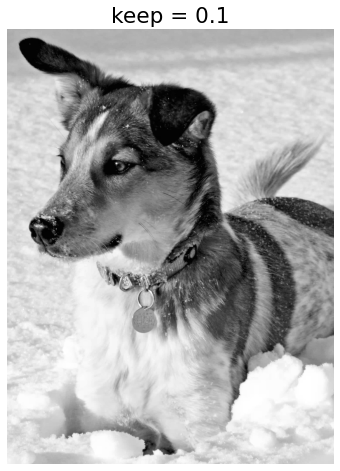

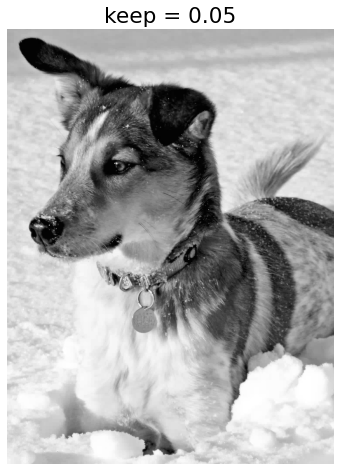

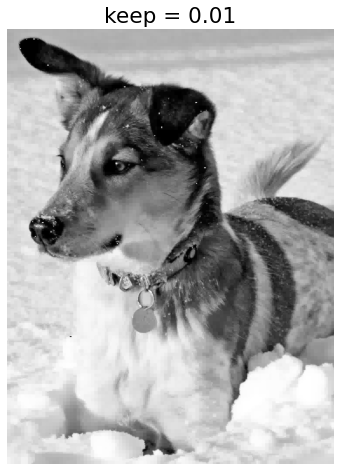

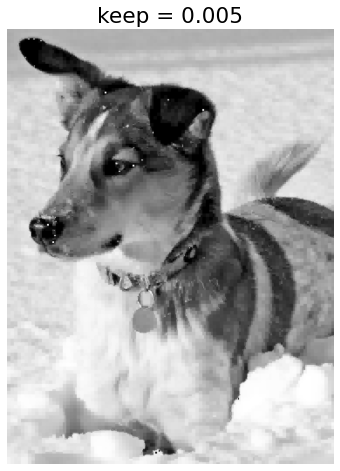

In [2]:
## Wavelet Compression
n = 4
w = 'db1' 
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))


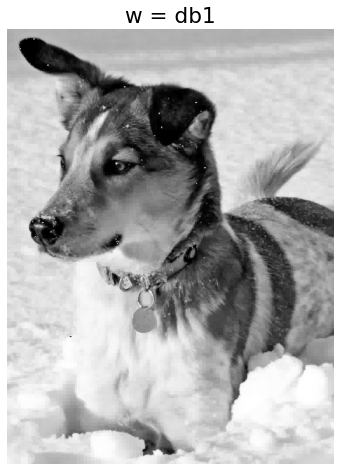

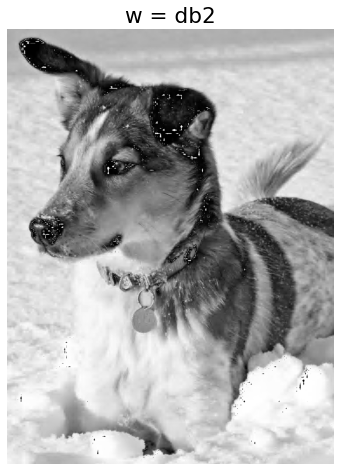

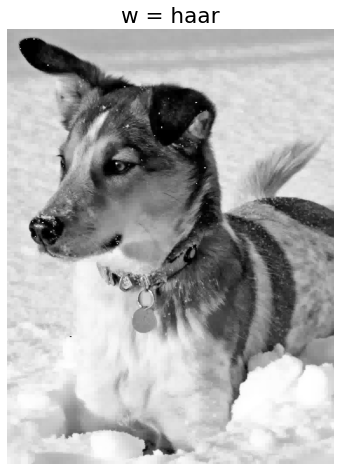

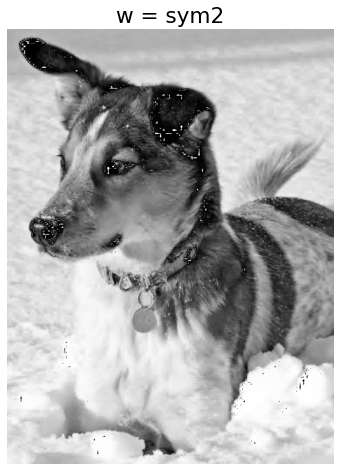

In [18]:
## Wavelet Compression
n = 4
for w in ('db1','db2','haar','sym2'):   # haar is no difference while db2 is odd
    coeffs = pywt.wavedec2(B,wavelet=w,level=n)

    coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

    Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

    keep = .01
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices

    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')

    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('w = ' + w)

In [11]:
coeffs[0].shape

(125, 94)

In [9]:
Arecon.shape

(2000, 1500)

(-0.5, 93.5, 124.5, -0.5)

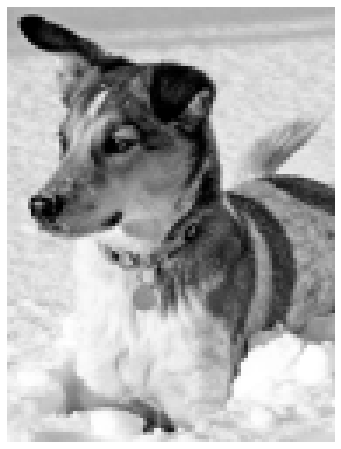

In [12]:
plt.figure()
plt.imshow(coeffs[0],cmap='gray')
plt.axis('off')